In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
with open('results/result_buffer_multiple_quiz_10_users.json', 'r') as f:
    data = json.load(f)['result']

# create a plot for each actor with scores over time

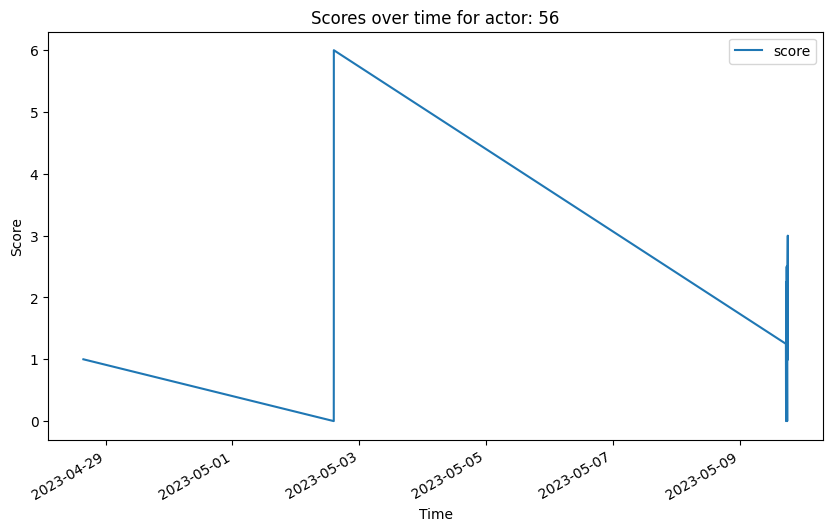

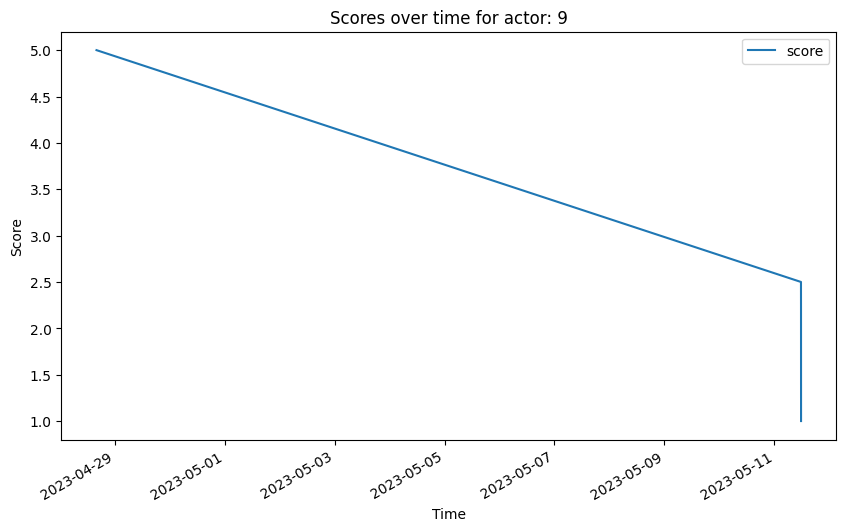

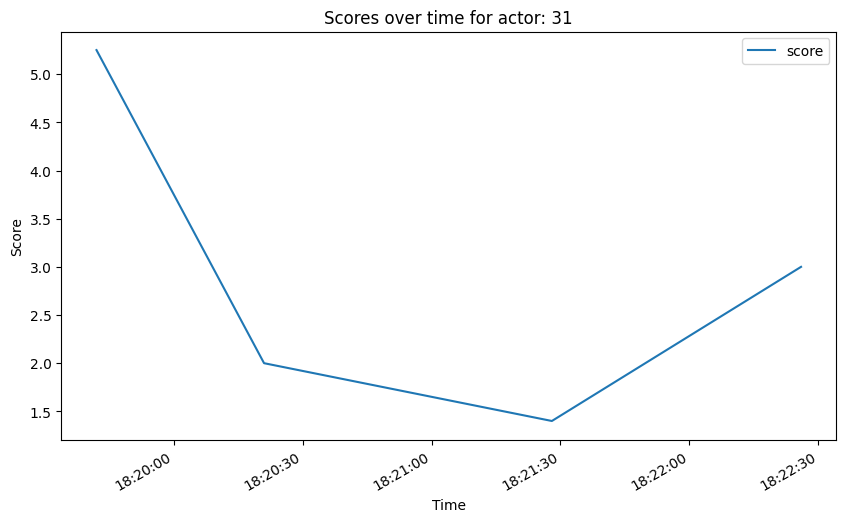

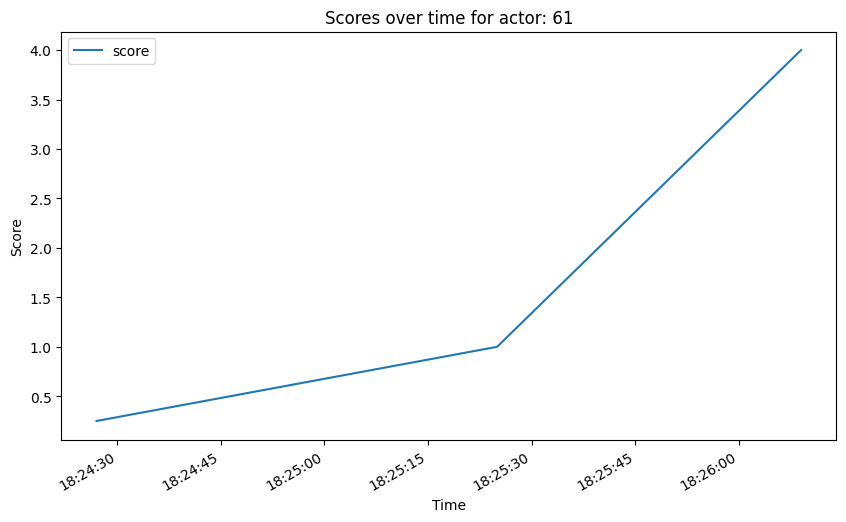

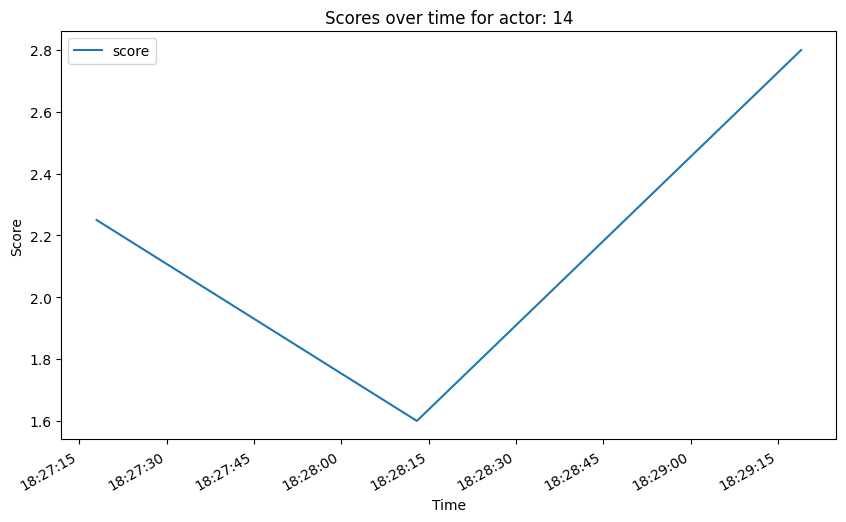

In [23]:

actors = data['actors']
df_list = []

for actor, actor_data in actors.items():
    for quiz, quiz_data in actor_data['taken_quizzes'].items():
        for score in quiz_data['submitted_scores']:
            df_list.append({
                'actor': actor,
                'quiz': quiz,
                'score': score['score'],
                'timestamp': pd.to_datetime(score['timestamp'])
            })

df = pd.DataFrame(df_list)


df = df.sort_values('timestamp')

# take actors with most scores for better visualization
most_interesting_actors = df['actor'].value_counts().index[:5]

# create a plot for each actor
for actor in most_interesting_actors:
    actor_data = df[df['actor'] == actor]

    fig, ax = plt.subplots(figsize=(10, 6))
    actor_data.plot(x='timestamp', y='score', ax=ax)

    plt.title(f'Scores over time for actor: {actor}')
    plt.xlabel('Time')
    plt.ylabel('Score')
    plt.show()

# create a boxplot for each quiz

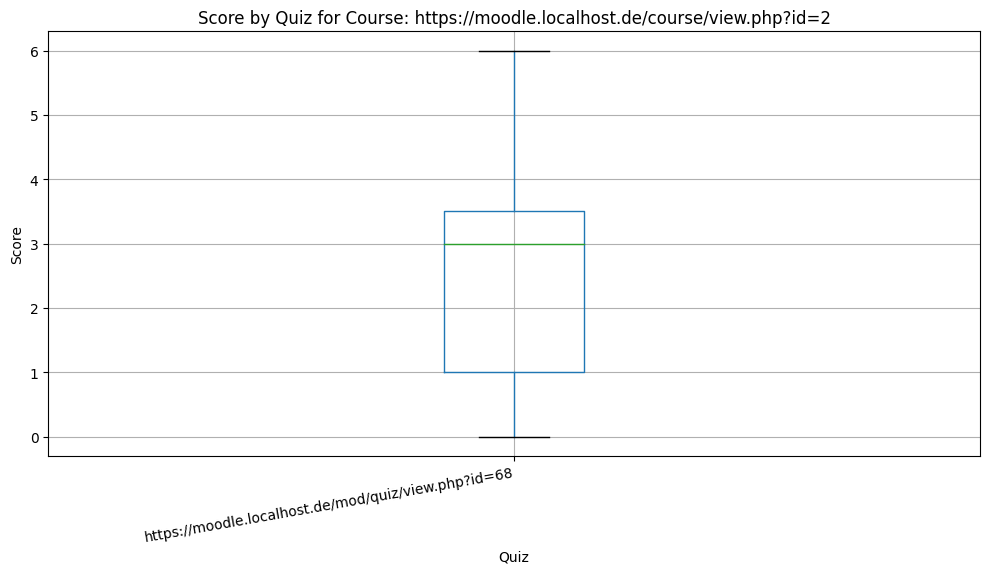

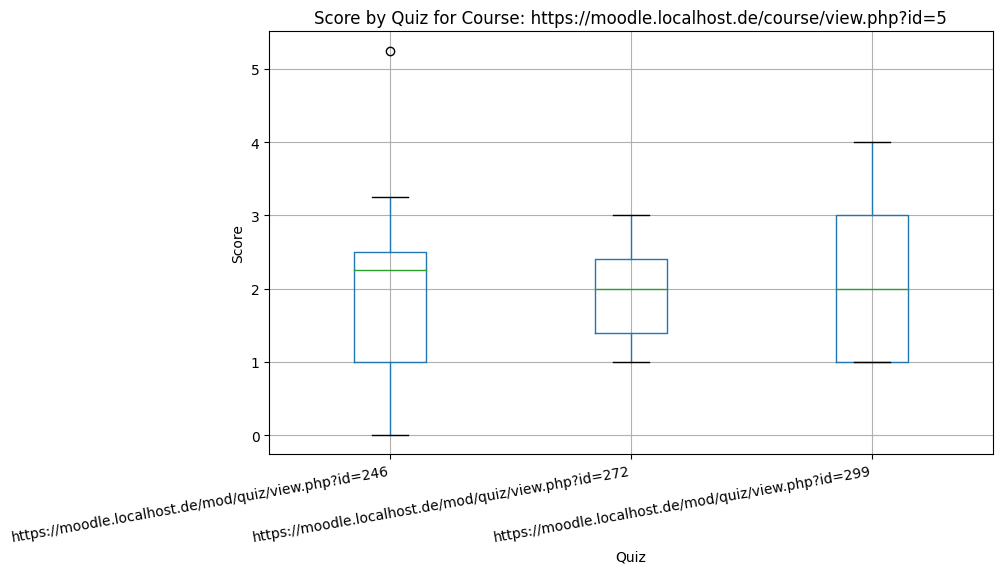

In [24]:
courses = data['courses']
df_quiz_list = []

for course, course_data in courses.items():
    for quiz, quiz_data in course_data['quizzes'].items():
        for actor, scores in quiz_data['scores'].items():
            for score in scores:
                df_quiz_list.append({
                    'course': course,
                    'quiz': quiz,
                    'actor': actor,
                    'score': score
                })

df_quiz = pd.DataFrame(df_quiz_list)

unique_courses = df_quiz['course'].unique()

for course in unique_courses:
    fig, ax = plt.subplots(figsize=(10, 6))
    course_data = df_quiz[df_quiz['course'] == course]
    course_data.boxplot(column='score', by='quiz', ax=ax)

    plt.title(f'Score by Quiz for Course: {course}')
    plt.xlabel('Quiz')
    plt.ylabel('Score')
    plt.suptitle('')
    plt.xticks(rotation=10, ha='right')
    plt.tight_layout()
    plt.show()


# create a plot for each quiz with average score per question

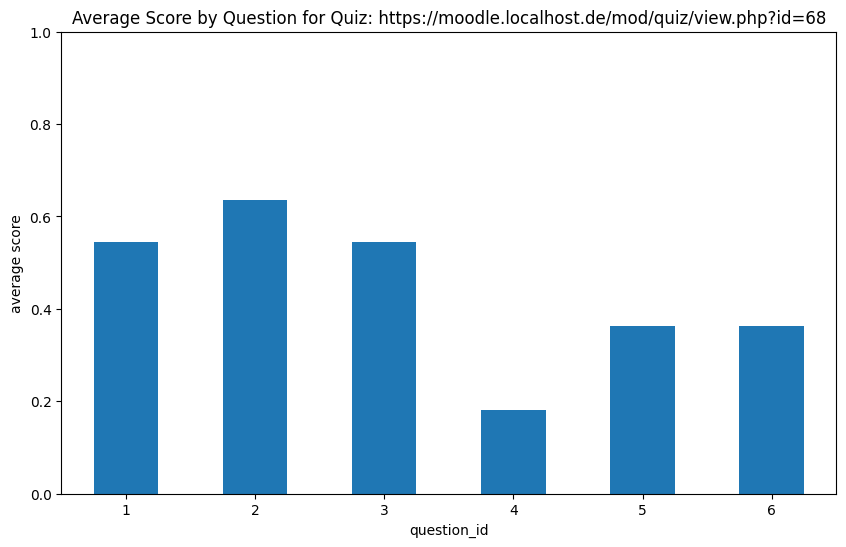

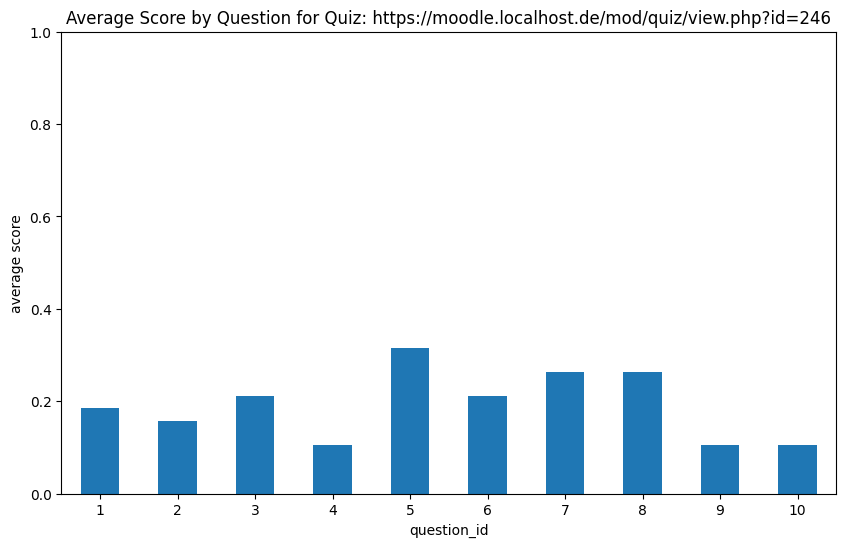

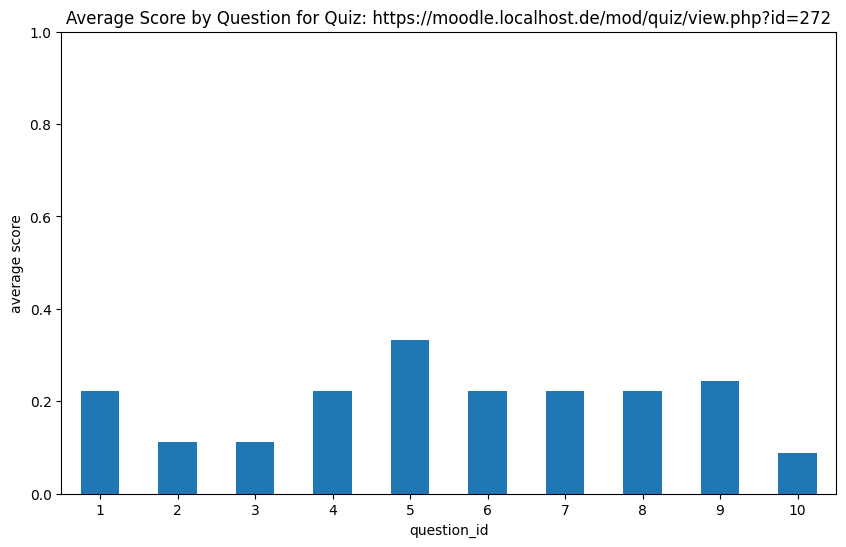

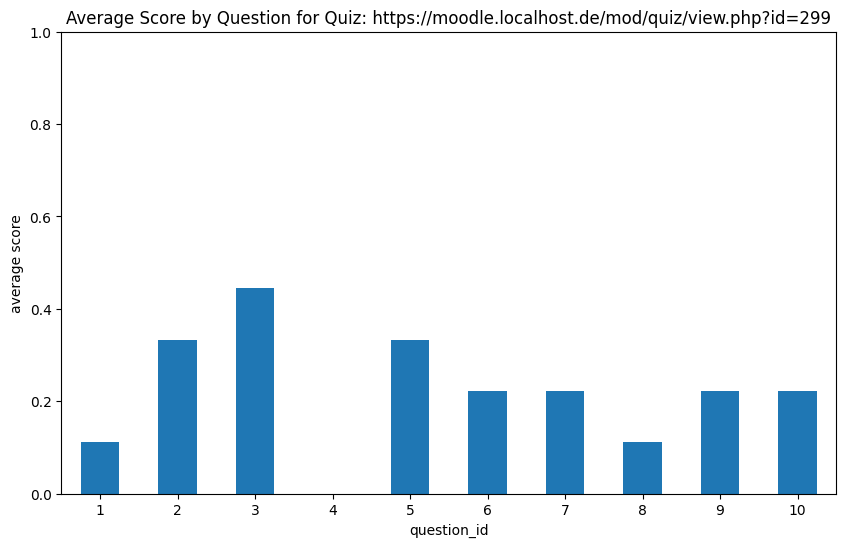

In [25]:
courses = data['courses']
df_quiz_answers_list = []

for course, course_data in courses.items():
    for quiz, quiz_data in course_data['quizzes'].items():
        for actor, answers in quiz_data['answers'].items():
            for answer in answers:
                df_quiz_answers_list.append({
                    'quiz': quiz,
                    'actor': actor,
                    'score': answer['score'],
                    'answered': answer['answered'],
                    'question_id': int(answer['question_id'])
                })

df_quiz_answers = pd.DataFrame(df_quiz_answers_list)

unique_quizzes = df_quiz_answers['quiz'].unique()

for quiz in unique_quizzes:
    fig, ax = plt.subplots(figsize=(10, 6))
    quiz_data = df_quiz_answers[df_quiz_answers['quiz'] == quiz]
    avg_scores = quiz_data.groupby('question_id')['score'].mean() #calculate average score per question

    avg_scores = avg_scores.sort_index()

    avg_scores.plot(kind='bar', ax=ax)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  # rotate x-axis labels
    ax.set_ylim([0, 1])  # set y-axis limits to 0 and 1

    plt.title(f'Average Score by Question for Quiz: {quiz}')
    plt.xlabel('question_id')
    plt.ylabel('average score')
    plt.show()
